In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
employers = pd.read_csv('Attrition_dataset.csv', sep=';')
cities = pd.read_csv('Cities_map.csv', sep=';')

In [4]:
print(employers.head())

   Emp_ID      MMM.YY  Age        Salary LastWorkingDate  Designation  \
0       1  01.01.2016   28  57387,00 USD             NaN            1   
1       1  01.02.2016   28  57387,00 USD             NaN            1   
2       1  01.03.2016   28  57387,00 USD      11.03.2016            1   
3       2  01.11.2017   31  67016,00 USD             NaN            2   
4       2  01.12.2017   31  67016,00 USD             NaN            2   

   Total.Business.Value  Quarterly.Rating Gender City Education_Level  \
0               2381060                 2   Male  C23          MASTER   
1               -665480                 2   Male  C23          MASTER   
2                     0                 2   Male  C23          MASTER   
3                     0                 1   Male   C7          Master   
4                     0                 1   Male   C7          Master   

  Dateofjoining  Joining.Designation  
0    24.12.2015                    1  
1    24.12.2015                    1  
2    

In [5]:
print(cities.head())

  City_ID  City_Name
0     C01     Austin
1     C02     Boston
2     C03  Charlotte
3     C04    Chicago
4     C05   Columbus


In [6]:
cities['City_ID'] = cities['City_ID'].apply(lambda x: x.replace('0','') if x[1]=='0' else x)
cities

,City_ID,City_Name
0,C1,Austin
1,C2,Boston
2,C3,Charlotte
3,C4,Chicago
4,C5,Columbus
5,C6,Dallas
6,C7,Denver
7,C8,Detroit
8,C9,El Paso
9,C10,Fort Worth


In [7]:
employers.rename(columns={
    'Emp_ID': 'ID',
    'MMM.YY': 'Date',
    'LastWorkingDate': 'Last Working Date',
    'Total.Business.Value': 'Total Business Value',
    'Quarterly.Rating': 'Quarterly Rating',
    'Education_Level': 'Education Level',
    'Dateofjoining': 'Date of Joining',
    'Joining.Designation':'Joining Designation'
}, inplace=True)

In [8]:
print(employers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19190 entries, 0 to 19189
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    19190 non-null  int64 
 1   Date                  19190 non-null  object
 2   Age                   19190 non-null  int64 
 3   Salary                19190 non-null  object
 4   Last Working Date     1628 non-null   object
 5   Designation           19190 non-null  int64 
 6   Total Business Value  19190 non-null  int64 
 7   Quarterly Rating      19190 non-null  int64 
 8   Gender                19190 non-null  object
 9   City                  19190 non-null  object
 10  Education Level       19190 non-null  object
 11  Date of Joining       19190 non-null  object
 12  Joining Designation   19190 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 1.9+ MB
None


In [9]:
employers.describe(include='all')

,ID,Date,Age,Salary,Last Working Date,Designation,Total Business Value,Quarterly Rating,Gender,City,Education Level,Date of Joining,Joining Designation
count,19190.000000,19190,19190.000000,19190,1628,19190.000000,1.919000e+04,19190.000000,19190,19190,19190,19190,19190.000000
unique,NaN,24,NaN,2383,493,NaN,NaN,NaN,2,29,6,869,NaN
top,NaN,01.01.2016,NaN,"48747,00 USD",29.07.2017,NaN,NaN,NaN,Male,C20,Bachelor,23.07.2012,NaN
freq,NaN,1025,NaN,57,71,NaN,NaN,NaN,11151,1014,5551,194,NaN
mean,1416.239083,NaN,34.649192,NaN,NaN,2.252579,5.710257e+05,2.008963,NaN,NaN,NaN,NaN,1.690412
std,810.866259,NaN,6.264600,NaN,NaN,1.026329,1.126591e+06,1.009839,NaN,NaN,NaN,NaN,0.836580
min,1.000000,NaN,21.000000,NaN,NaN,1.000000,-6.000000e+06,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,712.000000,NaN,30.000000,NaN,NaN,1.000000,0.000000e+00,1.000000,NaN,NaN,NaN,NaN,1.000000
50%,1417.500000,NaN,34.000000,NaN,NaN,2.000000,2.500000e+05,2.000000,NaN,NaN,NaN,NaN,1.000000
75%,2139.000000,NaN,39.000000,NaN,NaN,3.000000,6.995850e+05,3.000000,NaN,NaN,NaN,NaN,2.000000


In [10]:
print(employers['Education Level'])

0            MASTER
1            MASTER
2            MASTER
3            Master
4            Master
            ...    
19185        Colege
19186        Master
19187      Bachelor
19188    Bachelor's
19189        Master
Name: Education Level, Length: 19190, dtype: object


In [11]:
employers['Education Level'] = employers['Education Level'].apply(lambda x: 'Master' if x[0]== 'M' else ('College' if x[0]=='C' else 'Bachelor'))

In [12]:
employers['Salary'] = employers['Salary'].apply(lambda x: float(x.strip(' USD').replace(',','.')))

print(employers['Salary'])

0         57387.0
1         57387.0
2         57387.0
3         67016.0
4         67016.0
           ...   
19185     38619.0
19186     62292.0
19187     85688.0
19188    111507.0
19189    102822.0
Name: Salary, Length: 19190, dtype: float64


In [13]:
employers['Education Level'].nunique()

3

In [14]:
print(employers)

         ID        Date  Age    Salary Last Working Date  Designation  \
0         1  01.01.2016   28   57387.0               NaN            1   
1         1  01.02.2016   28   57387.0               NaN            1   
2         1  01.03.2016   28   57387.0        11.03.2016            1   
3         2  01.11.2017   31   67016.0               NaN            2   
4         2  01.12.2017   31   67016.0               NaN            2   
...     ...         ...  ...       ...               ...          ...   
19185  2044  01.03.2017   34   38619.0        23.03.2017            2   
19186  2651  01.08.2017   34   62292.0        29.07.2017            2   
19187  1864  01.01.2016   32   85688.0               NaN            3   
19188  2422  01.05.2016   47  111507.0               NaN            4   
19189  2598  01.10.2016   36  102822.0               NaN            3   

       Total Business Value  Quarterly Rating  Gender City Education Level  \
0                   2381060                 2

In [15]:
df = pd.merge(employers, cities.rename(
columns={
    'City_ID': 'City'
}), how='left')

In [16]:
print(df)

         ID        Date  Age    Salary Last Working Date  Designation  \
0         1  01.01.2016   28   57387.0               NaN            1   
1         1  01.02.2016   28   57387.0               NaN            1   
2         1  01.03.2016   28   57387.0        11.03.2016            1   
3         2  01.11.2017   31   67016.0               NaN            2   
4         2  01.12.2017   31   67016.0               NaN            2   
...     ...         ...  ...       ...               ...          ...   
19185  2044  01.03.2017   34   38619.0        23.03.2017            2   
19186  2651  01.08.2017   34   62292.0        29.07.2017            2   
19187  1864  01.01.2016   32   85688.0               NaN            3   
19188  2422  01.05.2016   47  111507.0               NaN            4   
19189  2598  01.10.2016   36  102822.0               NaN            3   

       Total Business Value  Quarterly Rating  Gender City Education Level  \
0                   2381060                 2

In [17]:
df.drop('City', inplace=True, axis=1)

In [18]:
df.rename(columns={
    'City_Name': 'City'
}, inplace=True)

In [19]:
print(df.head())

   ID        Date  Age   Salary Last Working Date  Designation  \
0   1  01.01.2016   28  57387.0               NaN            1   
1   1  01.02.2016   28  57387.0               NaN            1   
2   1  01.03.2016   28  57387.0        11.03.2016            1   
3   2  01.11.2017   31  67016.0               NaN            2   
4   2  01.12.2017   31  67016.0               NaN            2   

   Total Business Value  Quarterly Rating Gender Education Level  \
0               2381060                 2   Male          Master   
1               -665480                 2   Male          Master   
2                     0                 2   Male          Master   
3                     0                 1   Male          Master   
4                     0                 1   Male          Master   

  Date of Joining  Joining Designation      City  
0      24.12.2015                    1  Portland  
1      24.12.2015                    1  Portland  
2      24.12.2015                    1  P

In [20]:
df.loc[:, ['Date', 'ID', 'Age', 'Gender', 'City', 'Education Level', 'Salary', 'Date of Joining', 'Last Working Date', 'Joining Designation', 'Designation', 'Total Business Value', 'Quarterly Rating']]

,Date,ID,Age,Gender,City,Education Level,Salary,Date of Joining,Last Working Date,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,01.01.2016,1,28,Male,Portland,Master,57387.0,24.12.2015,NaN,1,1,2381060,2
1,01.02.2016,1,28,Male,Portland,Master,57387.0,24.12.2015,NaN,1,1,-665480,2
2,01.03.2016,1,28,Male,Portland,Master,57387.0,24.12.2015,11.03.2016,1,1,0,2
3,01.11.2017,2,31,Male,Denver,Master,67016.0,06.11.2017,NaN,2,2,0,1
4,01.12.2017,2,31,Male,Denver,Master,67016.0,06.11.2017,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19185,01.03.2017,2044,34,Male,Oklahoma City,College,38619.0,15.11.2016,23.03.2017,2,2,0,1
19186,01.08.2017,2651,34,Male,Houston,Master,62292.0,27.06.2016,29.07.2017,2,2,180000,1
19187,01.01.2016,1864,32,Female,Washington,Bachelor,85688.0,11.08.2011,NaN,1,3,3414220,3
19188,01.05.2016,2422,47,Male,Chicago,Bachelor,111507.0,26.08.2011,NaN,2,4,202400,2


1. MMM.YY - Dzień wpisania oceny miesięcznej pracownika do bazy
2. Emp_ID - Identyfikator pracownika
3. Age - Wiek
4. Gender - Płeć
5. City - Identyfikator dla oddziału mieszczącego się w danym mieście
6. Education_Level - Bachelor / College / Master
7. Salary - Wynagrodzenie roczne
8. Dateofjoining - Data dołączenia do firmy
9. LastWorkingDate - Data odejścia, jeśli pracownik odszedł w danym okresie
10. Joining.Designation - pięciostopniowy poziom kwalifikacji podczas rekrutacji (1 - niski poziom, 5 - bardzo wysoki poziom)
11. Designation - aktualny poziom kwalifikacji
12. Total.Business.Value - Sumaryczna ilość sprzedanych ubezpieczeń (KPI z którego są rozliczani w perspektywie miesięcznej)
13. Quarterly.Rating - ocena roczna (1 - niski poziom, 5 bardzo wysoki poziom)

In [21]:
df['Months at Work'] = df.groupby('ID')['ID'].transform('count')
df['Business Value'] = df.groupby('ID')['Total Business Value'].transform('sum')
df['Business Value per Month'] = df.apply(lambda row: int(row['Business Value']/row['Months at Work']),axis=1)
df['Employed'] = df.groupby('ID')['Last Working Date'].transform('sum')
df['Employed'] = df['Employed'].apply(lambda x: False if x!=0 else True)
df

,ID,Date,Age,Salary,Last Working Date,Designation,Total Business Value,Quarterly Rating,Gender,Education Level,Date of Joining,Joining Designation,City,Months at Work,Business Value,Business Value per Month,Employed
0,1,01.01.2016,28,57387.0,NaN,1,2381060,2,Male,Master,24.12.2015,1,Portland,3,1715580,571860,False
1,1,01.02.2016,28,57387.0,NaN,1,-665480,2,Male,Master,24.12.2015,1,Portland,3,1715580,571860,False
2,1,01.03.2016,28,57387.0,11.03.2016,1,0,2,Male,Master,24.12.2015,1,Portland,3,1715580,571860,False
3,2,01.11.2017,31,67016.0,NaN,2,0,1,Male,Master,06.11.2017,2,Denver,2,0,0,True
4,2,01.12.2017,31,67016.0,NaN,2,0,1,Male,Master,06.11.2017,2,Denver,2,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19185,2044,01.03.2017,34,38619.0,23.03.2017,2,0,1,Male,College,15.11.2016,2,Oklahoma City,6,466160,77693,False
19186,2651,01.08.2017,34,62292.0,29.07.2017,2,180000,1,Male,Master,27.06.2016,2,Houston,16,4996290,312268,False
19187,1864,01.01.2016,32,85688.0,NaN,3,3414220,3,Female,Bachelor,11.08.2011,1,Washington,25,32561210,1302448,True
19188,2422,01.05.2016,47,111507.0,NaN,4,202400,2,Male,Bachelor,26.08.2011,2,Chicago,25,37254730,1490189,True


In [22]:
m1 = ~df.duplicated(['ID'], keep='last')
df = df.loc[m1]
df

,ID,Date,Age,Salary,Last Working Date,Designation,Total Business Value,Quarterly Rating,Gender,Education Level,Date of Joining,Joining Designation,City,Months at Work,Business Value,Business Value per Month,Employed
2,1,01.03.2016,28,57387.0,11.03.2016,1,0,2,Male,Master,24.12.2015,1,Portland,3,1715580,571860,False
4,2,01.12.2017,31,67016.0,NaN,2,0,1,Male,Master,06.11.2017,2,Denver,2,0,0,True
9,4,01.04.2017,43,65603.0,27.04.2017,2,0,1,Male,Master,07.12.2016,2,Jacksonville,5,350000,70000,False
12,5,01.03.2016,29,46368.0,07.03.2016,1,0,1,Male,College,09.01.2016,1,El Paso,3,120360,40120,False
17,6,01.12.2017,31,78728.0,NaN,3,0,2,Female,Bachelor,31.07.2017,3,Houston,5,1265000,253000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19185,2044,01.03.2017,34,38619.0,23.03.2017,2,0,1,Male,College,15.11.2016,2,Oklahoma City,6,466160,77693,False
19186,2651,01.08.2017,34,62292.0,29.07.2017,2,180000,1,Male,Master,27.06.2016,2,Houston,16,4996290,312268,False
19187,1864,01.01.2016,32,85688.0,NaN,3,3414220,3,Female,Bachelor,11.08.2011,1,Washington,25,32561210,1302448,True
19188,2422,01.05.2016,47,111507.0,NaN,4,202400,2,Male,Bachelor,26.08.2011,2,Chicago,25,37254730,1490189,True


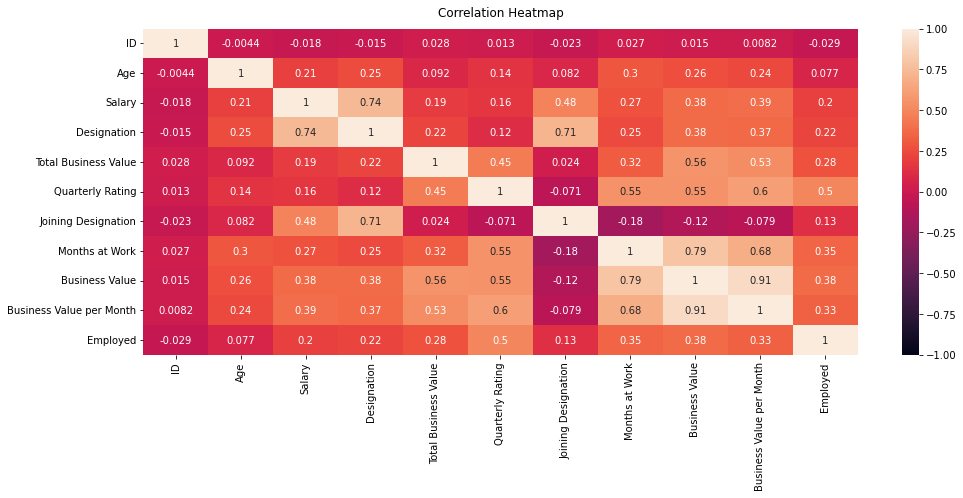

In [27]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);